## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
data.shape

(100, 8)

In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task: 1 Logistic Regression

### 1. Finding the Correlation between the features

In [7]:
# a. check the correlation between the features

data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

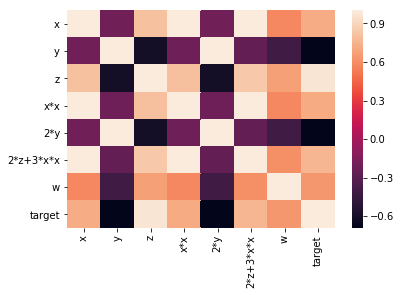

In [8]:
# b. plot heat map of correlation matrix using seaborn heatmap

sns.heatmap(data.corr())

### 2. Finding the best model for the given data

In [37]:
# a. Train Logistic regression on data(X,Y) that we have created in the above cell

cfg = SGDClassifier(loss='log')

In [38]:
# b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation 

tuned_para = [{'alpha':[10**-4,10**-2,10**0,10**2,10**4]}]
model = GridSearchCV(cfg,tuned_para)
model.fit(X_train,Y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [39]:
# c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

best_model = SGDClassifier(loss='log',alpha=0.0001)

### 3. Getting the weights with the original data

In [40]:
# a. train the 'best_model' with X, Y

best_model.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
# b. Check the accuracy of the model 'best_model_accuracy'

best_model.score(X_test,Y_test)

1.0

In [43]:
# c. Get the weights W using best_model.coef_

best_model.coef_

array([[ 1.45539838, -2.73789791,  6.40604411,  1.52898726, -2.73789791,
         2.14951829,  1.73227261]])

### 4. Modifying original data

In [44]:
# a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [45]:
# b. Train the same 'best_model' with data (X', Y)

In [46]:
# c. Check the accuracy of the model 'best_model_accuracy_edited'


In [ ]:
# d. Get the weights W' using best_model.coef_